### Importa librerie

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text
from custom.watermarks import add_watermark

### Definizione funzioni

In [2]:
def get_vaccine_data(country, time_window=30, fully=False):
    """ Recupera dati sulla frazione di vaccinati medi negli ultimi time_window giorni (default = 30)"""
    df_vacc_country2 = df_global[df_global["location"] == country]
    df_vacc_country = df_vacc_country2.fillna(method='ffill').copy()
    if fully==False:
        vacc_fully = np.array(df_vacc_country["people_vaccinated_per_hundred"][-(time_window+1):-1])
    else:
        vacc_fully = np.array(df_vacc_country["people_fully_vaccinated_per_hundred"][-(time_window+1):-1])
    
    vacc_ultimi_Ngiorni = np.mean(vacc_fully)   
    return vacc_ultimi_Ngiorni

def get_deaths(country, time_window=30):
    """ Recupera dati sul numero assoluto di decessi negli ultimi time_window giorni (default = 30)"""
    decessi = np.array(df_global[df_global["location"] == country]['total_deaths'])
    decessi_ultimi_Ngiorni = decessi[-1] - decessi[-(time_window+1)]
    return decessi_ultimi_Ngiorni

def get_value_from_df(countries, column, scale_factor=1):
    """ Recupera l'ultimo valore della column specificata, per la lista di countries, e moltiplica per scale_factor (default = 1)"""
    values = []
    for el in countries:
         values.append(df_global[df_global["location"] == el][column].tolist()[-1]*scale_factor)
    return values

### Importa dati da Our World in Data

In [3]:
file_owid = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df_global = pd.read_csv(file_owid)

In [4]:
# Dataframe solo per paesi europei
eu_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 
                'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 
                'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']
df_europe = df_global.loc[df_global['location'].isin(eu_countries)]

### Calcoli con diversi Paesi

In [5]:
# Definizione paesi e relative label
paesi = eu_countries
paesi_label = ['Austria', 'Belgio', 'Bulgaria', 'Croazia', 'Cipro', 'Repubblica Ceca', 'Danimarca', 'Estonia', 'Finlandia', 
                'Francia', 'Germania', 'Grecia', 'Ungheria', 'Irlanda', 'Italia', 'Lettonia', 'Lituania', 'Lussemburgo', 
                'Malta', 'Paesi Bassi', 'Polonia', 'Portogallo', 'Romania', 'Slovacchia', 'Slovenia', 'Spagna', 'Svezia']

# Calcola vaccinati e decessi
abitanti = get_value_from_df(paesi, 'population', scale_factor=1e-6)

# Crea dizionario
abitanti_dict = dict(zip(paesi, abitanti))

In [6]:
dec_res=[] # Decessi per milione di abitanti ultimi tw_death giorni
vacc_res=[] # % vaccinati media ultimi tw_vacc giorni

tw_death = 30
tw_vacc = 30
for i in range(len(paesi)):
    vacc_res.append(get_vaccine_data(paesi[i], time_window = tw_vacc, fully=True))
    dec_res.append(get_deaths(paesi[i], time_window = tw_death)/abitanti_dict[paesi[i]])

In [7]:
# Ricava altre grandezze
gdp = get_value_from_df(paesi, 'gdp_per_capita')
population_density = get_value_from_df(paesi, 'population_density')
aged_70_older = get_value_from_df(paesi, 'aged_70_older')
extreme_poverty = get_value_from_df(paesi, 'extreme_poverty')
diabetes_prevalence = get_value_from_df(paesi, 'diabetes_prevalence')
hospital_beds_per_thousand = get_value_from_df(paesi, 'hospital_beds_per_thousand')
human_development_index = get_value_from_df(paesi, 'human_development_index')

In [8]:
# Inserisci manualmente latitudine (in ordine alfabetico)
latitude = [47.516231, 50.503887, 42.733883, 45.1, 35.126413, 49.817492, 56.26392, 58.595272, 61.92411, 46.227638, 51.165691, 39.074208, 47.162494, 53.41291, 41.87194, 56.879635, 55.169438,
            49.815273, 35.937496, 52.132633, 51.919438, 39.399872, 45.943161, 48.669026, 46.151241, 40.463667, 60.128161
            ]

In [9]:
# Ordina tutte le list in base al numeri di % vaccinati crescente
paesi = [x for _, x in sorted(zip(vacc_res, paesi))]
paesi_label = [x for _, x in sorted(zip(vacc_res, paesi_label))]
dec_res = [x for _, x in sorted(zip(vacc_res, dec_res))]
gdp = [x for _, x in sorted(zip(vacc_res, gdp))]
latitude = [x for _, x in sorted(zip(vacc_res, latitude))]
population_density = [x for _, x in sorted(zip(vacc_res, population_density))]
aged_70_older = [x for _, x in sorted(zip(vacc_res, aged_70_older))]
extreme_poverty = [x for _, x in sorted(zip(vacc_res, extreme_poverty))]
diabetes_prevalence = [x for _, x in sorted(zip(vacc_res, diabetes_prevalence))]
hospital_beds_per_thousand = [x for _, x in sorted(zip(vacc_res, hospital_beds_per_thousand))]
human_development_index = [x for _, x in sorted(zip(vacc_res, human_development_index))]
vacc_res.sort()

In [10]:
# Trasforma variabili estratte in Dataframe
d = {'Country': paesi, 
     f'Deaths_last_{tw_death}_days': dec_res, 
     'Latitude': latitude,
     f'Perc_vacc_last_{tw_vacc}_days': vacc_res, 
     'GDP_per_capita': gdp, 
     'population_density': population_density,
     'aged_70_older': aged_70_older, 
     'extreme_poverty': extreme_poverty, 
     'diabetes_prevalence': diabetes_prevalence, 
     'hospital_beds_per_thousand': hospital_beds_per_thousand, 
    } 

df_europe_small = pd.DataFrame(data=d).round(decimals=2)
df_europe_small.set_index('Country', inplace=True)

In [11]:
#DEBUGONLY
df_europe_small

,Deaths_last_30_days,Latitude,Perc_vacc_last_30_days,GDP_per_capita,population_density,aged_70_older,extreme_poverty,diabetes_prevalence,hospital_beds_per_thousand
Country,,,,,,,,,
Bulgaria,505.75,42.73,20.92,18563.31,65.18,13.27,1.5,5.81,7.45
Romania,618.37,45.94,31.02,23313.20,85.13,11.69,5.7,9.74,6.89
Slovakia,93.21,48.67,42.00,30155.15,113.13,9.17,0.7,7.29,5.82
Croatia,183.26,45.10,43.19,22669.80,73.73,13.05,0.7,5.59,5.54
Latvia,381.37,56.88,52.04,25063.85,31.21,14.14,0.7,4.91,5.57
Poland,50.88,51.92,52.41,27216.44,124.03,10.20,NaN,5.91,6.62
Slovenia,109.68,46.15,53.21,31400.84,102.62,12.93,NaN,7.25,4.50
Estonia,165.26,58.60,56.48,29481.25,31.03,13.49,0.5,4.02,4.69
Czechia,49.05,49.82,56.50,32605.91,137.18,11.58,NaN,6.82,6.63


In [12]:
corr = df_europe_small.corr()
# Plot only half correlation matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1'))  # Color NaNs grey

,Deaths_last_30_days,Latitude,Perc_vacc_last_30_days,GDP_per_capita,population_density,aged_70_older,extreme_poverty,diabetes_prevalence,hospital_beds_per_thousand
Deaths_last_30_days,nan,nan,nan,nan,nan,nan,nan,nan,nan
Latitude,0.032228,nan,nan,nan,nan,nan,nan,nan,nan
Perc_vacc_last_30_days,-0.754270,-0.037601,nan,nan,nan,nan,nan,nan,nan
GDP_per_capita,-0.463196,0.268820,0.410236,nan,nan,nan,nan,nan,nan
population_density,-0.250408,-0.357938,0.358996,0.130141,nan,nan,nan,nan,nan
aged_70_older,0.089660,0.031547,0.140452,-0.318411,-0.135075,nan,nan,nan,nan
extreme_poverty,0.674933,-0.235576,-0.516617,-0.356608,-0.172012,0.118310,nan,nan,nan
diabetes_prevalence,0.037833,-0.529349,-0.022264,-0.326223,0.252022,-0.078269,0.385693,nan,nan
hospital_beds_per_thousand,0.471205,-0.034396,-0.585694,-0.314582,-0.065464,0.076891,0.293696,0.137327,nan


### Grafici

watermark fontsize: 35, angle:-23.96


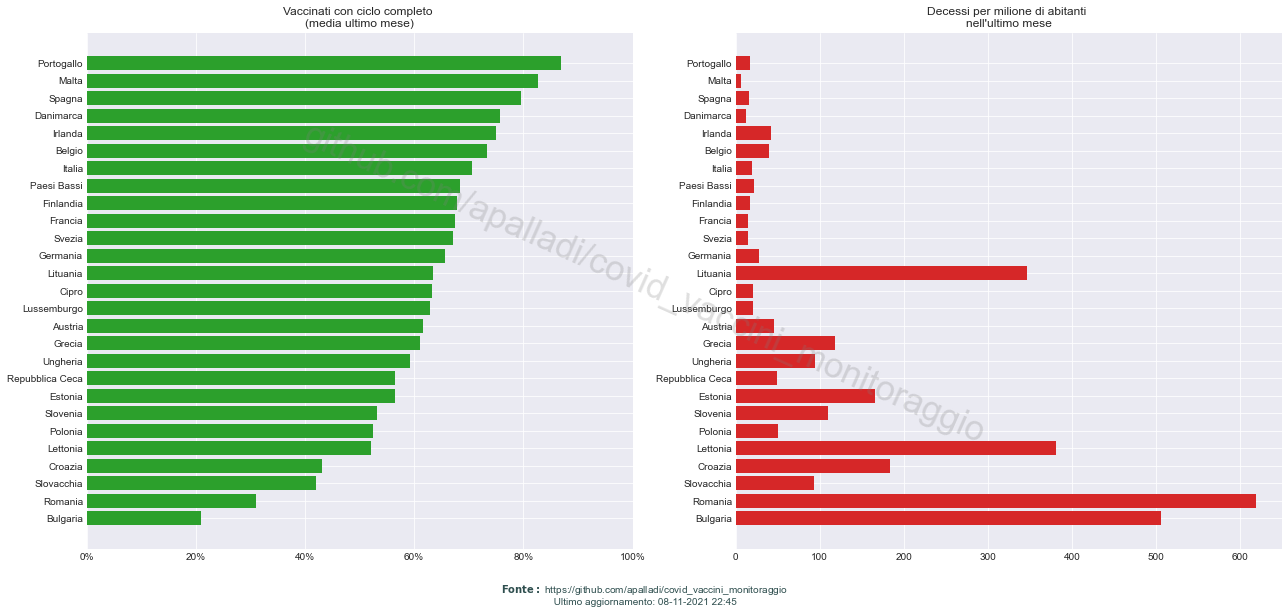

In [13]:
plt.style.use('seaborn-dark')

fig = plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.barh(paesi_label, vacc_res, color='C2')
plt.title('Vaccinati con ciclo completo \n(media ultimo mese)')
plt.grid()
plt.xlim(0, 100)
plt.xticks(np.arange(0, 101, 20), ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.subplot(1, 2, 2)
plt.barh(paesi_label, dec_res, color='C3')
plt.title('Decessi per milione di abitanti \nnell\'ultimo mese')
plt.grid()
ax = plt.gca()
add_watermark(fig, ax.xaxis.label.get_fontsize())
plt.tight_layout()
plt.savefig('../risultati/correlazione_vaccini_decessi.png', dpi=300, bbox_inches="tight")
plt.show()

In [14]:
corr_coeff = np.corrcoef(vacc_res, dec_res)[0, 1]
print('Il coefficiente di correlazione tra frazione di vaccinati e decessi nell\'ultimo mese è', 
      round(corr_coeff, 2))

Il coefficiente di correlazione tra frazione di vaccinati e decessi nell'ultimo mese è -0.75


### Variazione della correlazione in funzione del tempo

In [15]:
def corr_window(tw):

    dec_res=[]
    vacc_res=[]

    for i in range(len(paesi)):
        vacc_res.append(get_vaccine_data(paesi[i], time_window = tw, fully=True))
        dec_res.append(get_deaths(paesi[i], time_window = tw)/abitanti_dict[paesi[i]])
       
    corr_tw = np.corrcoef(vacc_res, dec_res)[0, 1]

    return corr_tw

In [16]:
tw_grid = np.arange(7, 250, 5)

corr_grid = [np.abs(corr_window(tw)) for tw in tw_grid]

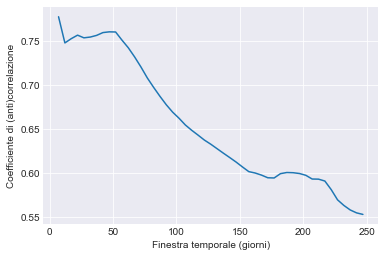

In [17]:
plt.plot(tw_grid, corr_grid)
plt.xlabel('Finestra temporale (giorni)')
plt.ylabel('Coefficiente di (anti)correlazione')
plt.grid()
plt.show()

### Decessi vs vaccini

watermark fontsize: 23, angle:-45.0


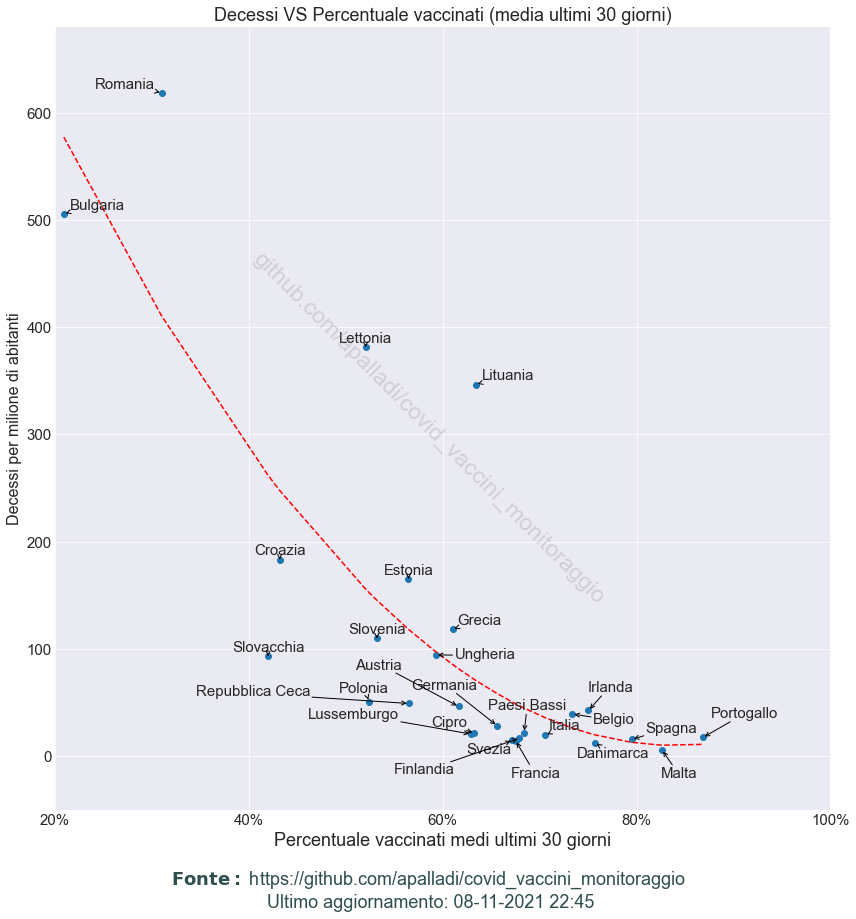

In [18]:
plt.style.use('seaborn-dark')

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(vacc_res, dec_res)
corr_coeff = round(np.corrcoef(vacc_res, dec_res)[0, 1], 2)
plt.title(f'Decessi VS Percentuale vaccinati (media ultimi {tw_death} giorni)', fontsize=18)
plt.grid()
plt.xlabel(f'Percentuale vaccinati medi ultimi {tw_vacc} giorni', fontsize=18)
plt.xlim(20, 100)
plt.ylabel('Decessi per milione di abitanti', fontsize=16)
plt.ylim(-50, max(dec_res)*1.1)
plt.xticks(np.arange(20, 101, 20), ['20%', '40%', '60%', '80%', '100%'], fontsize=15)
plt.yticks(fontsize=15)

# Aggiungi annotazione
texts = []
for i, el in enumerate(paesi_label):
    texts.append(ax.text(vacc_res[i], dec_res[i], el, fontsize=15))
adjust_text(texts, autoalign={'y'}, precision=0.01, arrowprops=dict(arrowstyle='->', color='black'))

# Plotta linea che fitta
z = np.polyfit(vacc_res, dec_res, 2)
p = np.poly1d(z)
plt.plot(vacc_res, p(sorted(vacc_res)),"r--")

ax = plt.gca()
add_watermark(fig, ax.xaxis.label.get_fontsize())
plt.tight_layout()
plt.savefig('../risultati/correlazione_decessi_vaccini.png', dpi=300, bbox_inches="tight")
plt.show()

In [19]:
corr_coeff = round(np.corrcoef((vacc_res, dec_res))[0, 1], 2)
corr_coeff

-0.75

### Vaccini vs GDP

watermark fontsize: 23, angle:-45.0


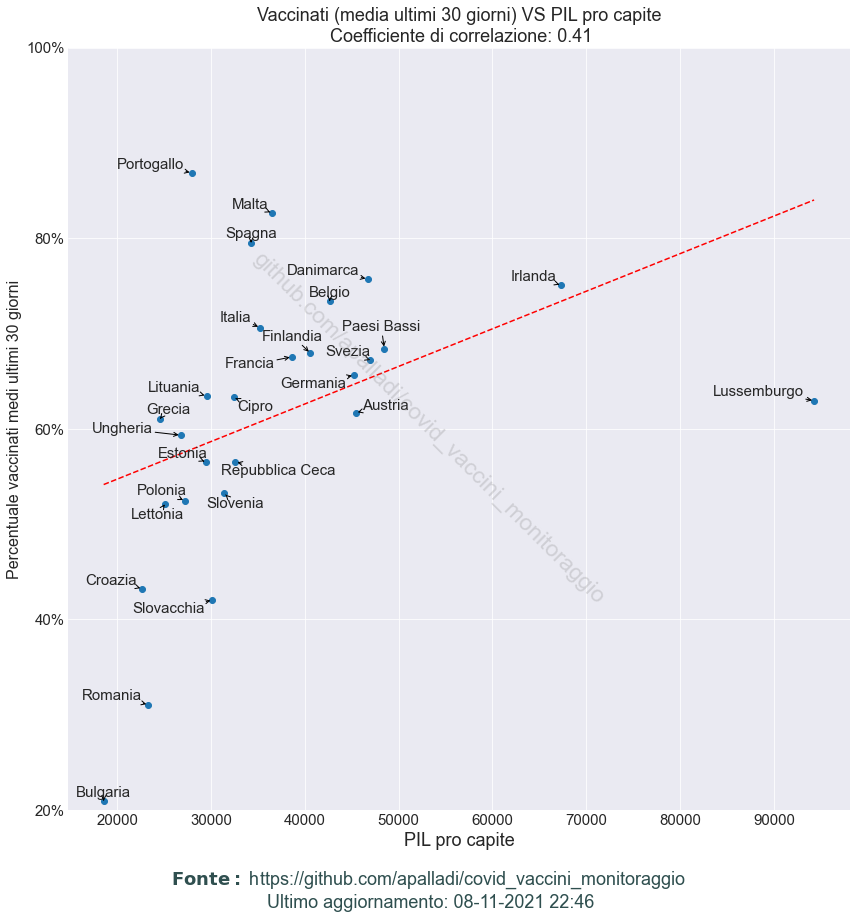

In [20]:
plt.style.use('seaborn-dark')

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(gdp, vacc_res)
corr_coeff = round(np.corrcoef(sorted(gdp), [x for _, x in sorted(zip(gdp, vacc_res))])[0, 1], 2)
plt.title(f'Vaccinati (media ultimi {tw_vacc} giorni) VS PIL pro capite\n Coefficiente di correlazione: {corr_coeff}', fontsize=18)
plt.grid()
plt.xlabel('PIL pro capite', fontsize=18)
plt.ylabel(f'Percentuale vaccinati medi ultimi {tw_vacc} giorni', fontsize=16)
plt.ylim(20)
plt.xticks(fontsize=15)
plt.yticks(np.arange(20, 101, 20), ['20%', '40%', '60%', '80%', '100%'], fontsize=15)

# Aggiungi annotazione
texts = []
for i, el in enumerate(paesi_label):
    texts.append(ax.text(gdp[i], vacc_res[i], el, fontsize=15))
adjust_text(texts, autoalign={'y'}, precision=0.01, arrowprops=dict(arrowstyle='->', color='black'))

# Plotta linea che fitta
z = np.polyfit(sorted(gdp), [x for _, x in sorted(zip(gdp, vacc_res))], 1)
p = np.poly1d(z)
plt.plot(sorted(gdp), p(sorted(gdp)),"r--")

ax = plt.gca()
add_watermark(fig, ax.xaxis.label.get_fontsize())
plt.tight_layout()
plt.savefig('../risultati/correlazione_vaccini_gdp_no_outliers.png', dpi=300, bbox_inches="tight")
plt.show()

In [21]:
# Escludi Lussemburgo e Irlanda (outliers)
lux_index = paesi.index("Luxembourg")
paesi.pop(lux_index)
paesi_label.pop(lux_index)
vacc_res.pop(lux_index)
gdp.pop(lux_index)

ire_index = paesi.index("Ireland")
paesi.pop(ire_index)
paesi_label.pop(ire_index)
vacc_res.pop(ire_index)
gdp.pop(ire_index)

67335.293

watermark fontsize: 23, angle:-45.0


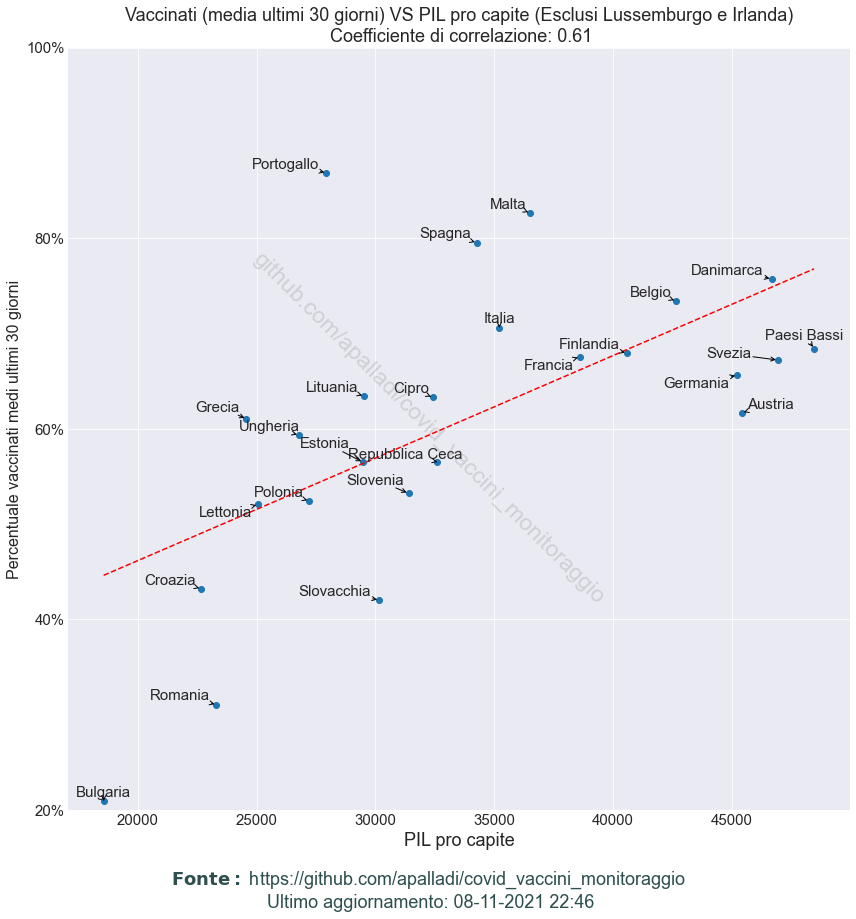

In [22]:
plt.style.use('seaborn-dark')

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(gdp, vacc_res)
corr_coeff = round(np.corrcoef(sorted(gdp), [x for _, x in sorted(zip(gdp, vacc_res))])[0, 1], 2)
plt.title(f'Vaccinati (media ultimi {tw_vacc} giorni) VS PIL pro capite (Esclusi Lussemburgo e Irlanda)\n Coefficiente di correlazione: {corr_coeff}', fontsize=18)
plt.grid()
plt.xlabel('PIL pro capite', fontsize=18)
plt.ylabel(f'Percentuale vaccinati medi ultimi {tw_vacc} giorni', fontsize=16)
plt.ylim(20)
plt.xticks(fontsize=15)
plt.yticks(np.arange(20, 101, 20), ['20%', '40%', '60%', '80%', '100%'], fontsize=15)

# Add annotation
texts = []
for i, el in enumerate(paesi_label):
    texts.append(ax.text(gdp[i], vacc_res[i], el, fontsize=15))
adjust_text(texts, autoalign={'y'}, precision=0.01, arrowprops=dict(arrowstyle='->', color='black'))

# Plot line that fits
z = np.polyfit(sorted(gdp), [x for _, x in sorted(zip(gdp, vacc_res))], 1)
p = np.poly1d(z)
plt.plot(sorted(gdp), p(sorted(gdp)),"r--")

ax = plt.gca()
add_watermark(fig, ax.xaxis.label.get_fontsize())
plt.tight_layout()
plt.savefig('../risultati/correlazione_vaccini_gdp_no_outliers.png', dpi=300, bbox_inches="tight")
plt.show()